In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Carregando a imagem do objeto
imagem = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/trabalho/rainha.bmp', cv2.COLOR_BGR2RGB) 
fundo = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/trabalho/background.bmp', cv2.COLOR_BGR2RGB) 

img_resized = cv2.resize(imagem, (fundo.shape[1], fundo.shape[0]))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
lower_green = (0, 100, 0)  
upper_green = (120, 255, 100)  

In [ ]:
mask = cv2.inRange(imagem, lower_green, upper_green)

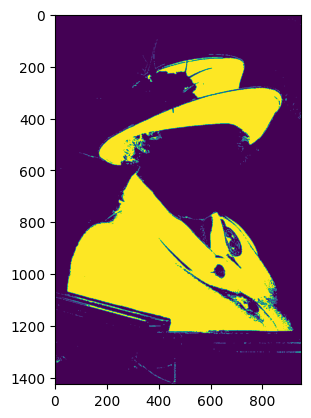

In [ ]:
plt.imshow(mask)

## Binarização

True

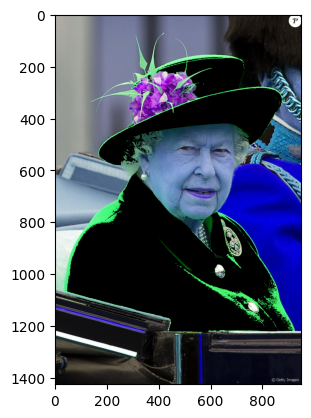

In [ ]:
mascara_imagem = np.copy(imagem) 
mascara_imagem[mask != 0] = [0, 0, 0]

plt.imshow(mascara_imagem)

cv2.imwrite('01-binarizacao_rainha.png', mascara_imagem)

# Filtro de Gauss 

In [ ]:
imagem_gauss = cv2.GaussianBlur(mascara_imagem, (25, 25), 0)

True

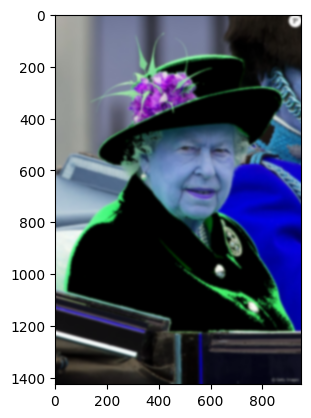

In [ ]:
plt.imshow(imagem_gauss)

cv2.imwrite('02-gauss_rainha.png', mascara_imagem)

## Filtro de Sobel

In [ ]:
sobel_x = cv2.Sobel(imagem_gauss, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(imagem_gauss, cv2.CV_64F, 0, 1, ksize=3)

combinado_sabel = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

True

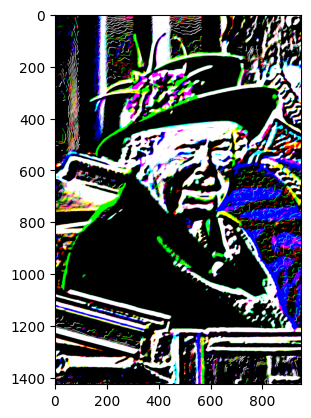

In [ ]:
plt.imshow(combinado_sabel)
cv2.imwrite('03-sobel_rainha.png', combinado_sabel)

In [ ]:
tamanho_fundo = fundo[0:564, 0:753]
tamanho_fundo = cv2.resize(tamanho_fundo, (combinado_sabel.shape[1], combinado_sabel.shape[0]))

In [ ]:
tamanho_fundo[mask == 0] = [0, 0, 0]

True

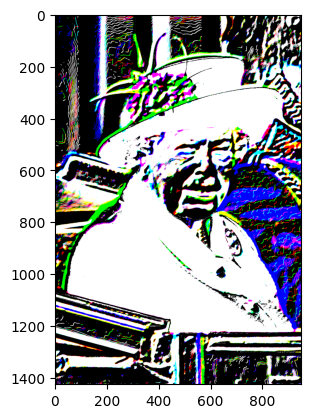

In [ ]:
imagem_final = tamanho_fundo + combinado_sabel
plt.imshow(imagem_final)
cv2.imwrite('04-resultado_final.png', imagem_final)

True

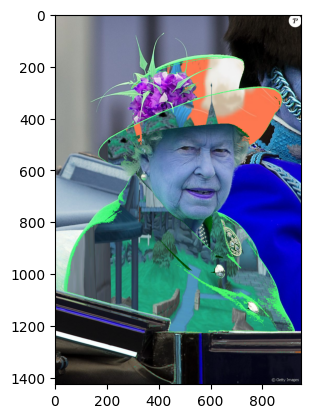

In [ ]:
imagem_final = tamanho_fundo + mascara_imagem
plt.imshow(imagem_final)
cv2.imwrite('SEM APLICAR FILTRO.png', imagem_final)